In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# Declare a Base using 'automap_base()'
Base = automap_base()

# reflect an existing database into a new model
Base.prepare(autoload_with=engine)


In [8]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [11]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [12]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [19]:
# Find the most recent date in the data set.
first_row = session.query(Measurement).order_by(Measurement.date.desc()).first()

first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x12fa66020>,
 'prcp': 0.0,
 'id': 2724,
 'station': 'USC00519397',
 'date': '2017-08-23',
 'tobs': 81.0}

Text(57.20833333333333, 0.5, 'Precipitation (inches)')

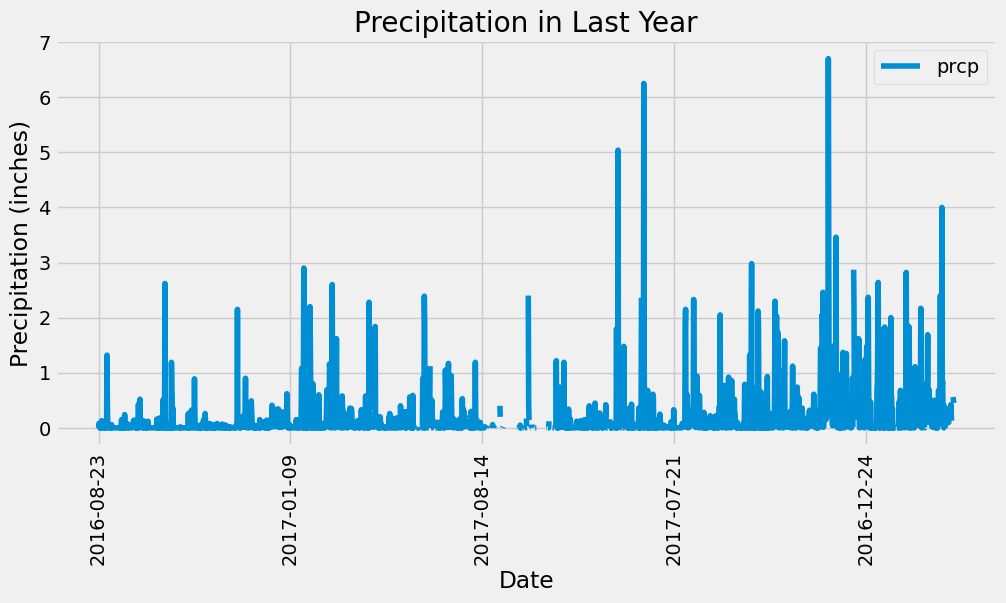

In [62]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
query_date = dt.date(2017,8,23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
query = session.query(Measurement.prcp, Measurement.id, Measurement.station, Measurement.date, Measurement.tobs).\
    filter(Measurement.date >= query_date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
measurement_df = pd.DataFrame(query, columns=['prcp','id','station','date','tobs'])

# Sort the dataframe by date
measurement_df.astype({'date':'datetime64[ns]'})
measurement_df.sort_values('date')

# Use Pandas Plotting with Matplotlib to plot the data
measurement_df.plot(x='date',y='prcp', figsize=(10,6))
plt.xticks(rotation=90)
plt.tight_layout()
plt.title('Precipitation in Last Year')
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')

In [64]:
# Use Pandas to calculate the summary statistics for the precipitation data
measurement_df['prcp'].describe()

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64

# Exploratory Station Analysis

In [66]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(Station.id)).all()

[(9,)]

In [73]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
query =  session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

for station, count in query:
    print(station, count)

USC00519281 2772
USC00519397 2724
USC00513117 2709
USC00519523 2669
USC00516128 2612
USC00514830 2202
USC00511918 1979
USC00517948 1372
USC00518838 511


In [88]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
fields = [Measurement.station,func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)]

mostActiveStation = session.query(*fields).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).first()
mostActiveStation

('USC00519281', 54.0, 85.0, 71.66378066378067)

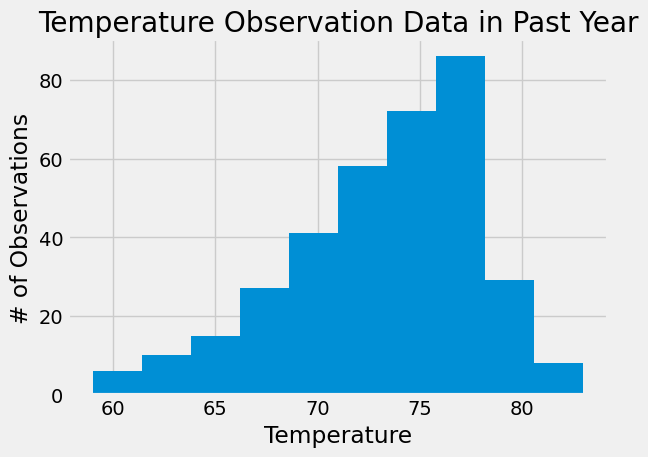

In [101]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
stationId = mostActiveStation[0]

query = session.query(Measurement.tobs).\
    filter(Measurement.date >= query_date).\
    filter(Measurement.station == stationId).all()
    
temp_df = pd.DataFrame(query, columns=['temperature'])

plt.hist(temp_df)
plt.title('Temperature Observation Data in Past Year')
plt.xlabel('Temperature')
plt.ylabel('# of Observations')
plt.tight_layout()
plt.show()

# Close Session

In [16]:
# Close Session
session.close()